# Monosynaptic pair analysis
-------

Example notebook demonstrating simple functions in SynapticConn for plotting spike trains. 

In [1]:
import os
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

os.chdir('../..')
print(os.getcwd())

import synapticonn as synapticonn

/Users/michael.zabolocki/Desktop/code/SynaptiConn


Load data. 

In [2]:
data_fpath = pathlib.Path('tests', 'BD0187_spikesorting_array.pkl')

# open pickle
all_units = np.load(data_fpath, allow_pickle=True)
all_units = all_units['spike_time_set']

Set parameters.

In [3]:
srate = 30_000
bin_size_ms = 0.5
max_lag_ms = 25

Initialize the object.

In [4]:
snc = synapticonn.SynaptiConn(all_units, bin_size_ms=1, max_lag_ms=100, srate=30_000, recording_length_ms=600*1000)

Check the loaded spike units.

In [5]:
spk_unit_report = snc.report_spike_units()
pd.DataFrame(spk_unit_report)

,unit_id,n_spikes
0,5,302
1,1,1152
2,0,918
3,16,524
4,17,315
5,18,195
6,15,192
7,4,299
8,3,277


## Spike isolation quality metrics
----

Prior to proceeding, it is important to cross-check the quality of the spike sorted neurons. 

Metrics related to the spike quality can be found below. Notably, the autocorrelograms for each unit should also be cross-referenced prior to continuing. Low contamination (or no contamination) in the refractory periods are important for correct assesments of spike-units and their monosynaptic connections.

**NOTE** here, more simple and core metric assessments are performed. In the future, these will be extended. For further quality metrics, please see the following [code](https://github.com/SpikeInterface/spikeinterface/blob/main/src/spikeinterface/qualitymetrics/misc_metrics.py#L1183). Further, Allen Brain have core documentation which can be found [here](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html#ISI-violations) explaining some key metrics to assess spike unit quality.

In [6]:
params = {'isi_threshold_ms': 1.5,
          'min_isi_ms': 0.3,  # note :: isi min should be based on the miniimum possible refractory period (e.g. spikes removed would constitute this)
          'presence_ratio_bin_duration_ms': 60*1000,
          'presence_ratio_mean_fr_ratio_thresh': 0.0}

qc = snc.spike_unit_quality(**params)
qc

,isi_violations_ratio,isi_violations_rate,isi_violations_count,isi_violations_of_total_spikes,presence_ratio,recording_length_sec,n_spikes,firing_rate_hz
5,0.000000,0.000000,0.0,0.000000,0.909091,600.0,302.0,0.503333
1,0.753520,0.006667,4.0,0.003472,0.909091,600.0,1152.0,1.920000
0,1.186628,0.006667,4.0,0.004357,0.909091,600.0,918.0,1.530000
16,0.000000,0.000000,0.0,0.000000,0.909091,600.0,524.0,0.873333
17,0.000000,0.000000,0.0,0.000000,0.909091,600.0,315.0,0.525000
18,0.000000,0.000000,0.0,0.000000,0.909091,600.0,195.0,0.325000
15,0.000000,0.000000,0.0,0.000000,0.909091,600.0,192.0,0.320000
4,0.000000,0.000000,0.0,0.000000,0.909091,600.0,299.0,0.498333
3,0.000000,0.000000,0.0,0.000000,0.909091,600.0,277.0,0.461667


Filter the spike times for 'good units' based on the quality control metrics.

These will then be used for all further processing. The spike times will be updated accordingly.

A log of the excluded units can be found and kept.

In [7]:
query = 'presence_ratio > 0.5'
good_units = snc.filter_spike_units(qc, query, log=True)
good_units

,isi_violations_ratio,isi_violations_rate,isi_violations_count,isi_violations_of_total_spikes,presence_ratio,recording_length_sec,n_spikes,firing_rate_hz
5,0.000000,0.000000,0.0,0.000000,0.909091,600.0,302.0,0.503333
1,0.753520,0.006667,4.0,0.003472,0.909091,600.0,1152.0,1.920000
0,1.186628,0.006667,4.0,0.004357,0.909091,600.0,918.0,1.530000
16,0.000000,0.000000,0.0,0.000000,0.909091,600.0,524.0,0.873333
17,0.000000,0.000000,0.0,0.000000,0.909091,600.0,315.0,0.525000
18,0.000000,0.000000,0.0,0.000000,0.909091,600.0,195.0,0.325000
15,0.000000,0.000000,0.0,0.000000,0.909091,600.0,192.0,0.320000
4,0.000000,0.000000,0.0,0.000000,0.909091,600.0,299.0,0.498333
3,0.000000,0.000000,0.0,0.000000,0.909091,600.0,277.0,0.461667


Check the updates.

In [8]:
spk_unit_report = snc.report_spike_units()
pd.DataFrame(spk_unit_report)

,unit_id,n_spikes
0,5,302
1,1,1152
2,0,918
3,16,524
4,17,315
5,18,195
6,15,192
7,4,299
8,3,277


## Auto-correlograms
---

Compute the autocorrelogram for select unit IDs.

Plotting autocorrelogram for spike units: [3 1]


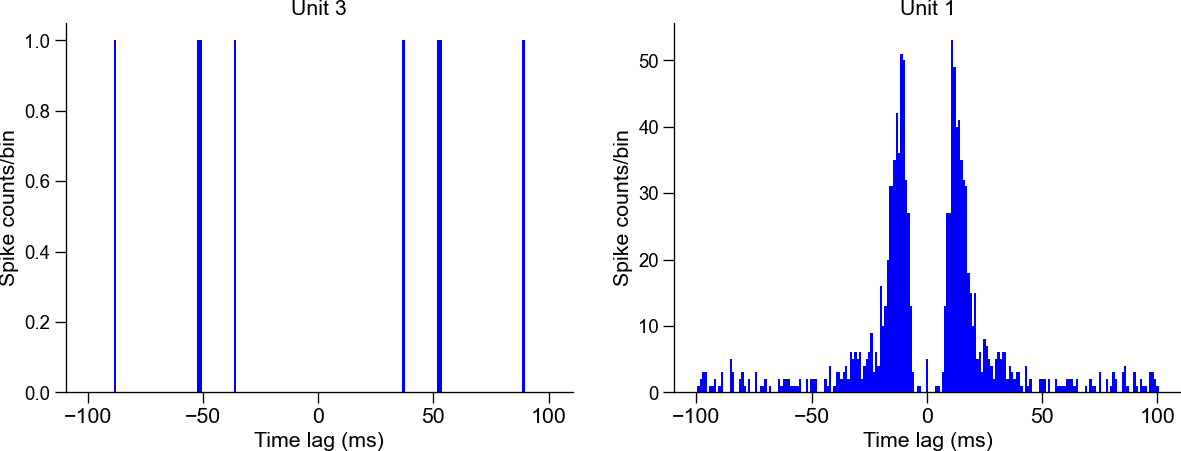

In [9]:
snc.plot_autocorrelogram(spike_units=[3,1,100], color='blue')

Set the bin parameters after initialization, and re-plot.

This can be used to change the binning on the plots, and max time lags.

Plotting autocorrelogram for spike units: [ 0  1 16 17]


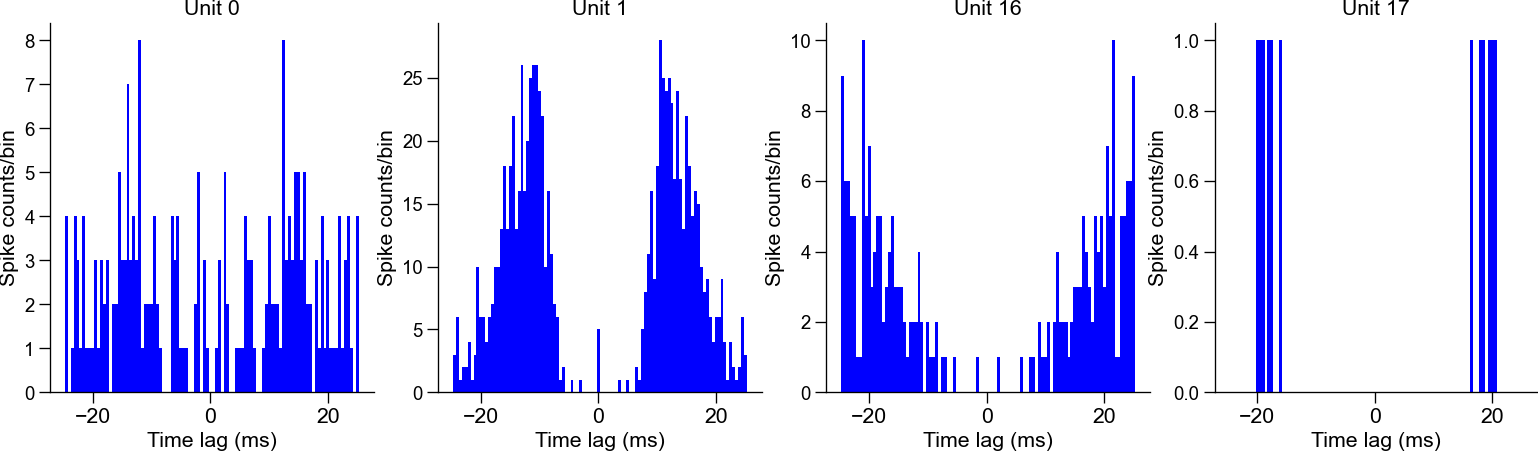

In [10]:
snc.set_bin_settings(bin_size_ms=0.5, max_lag_ms=25)
snc.plot_autocorrelogram(spike_units=[0,1,16,17], color='blue', figsize=(20,5))

## Cross-correlograms
----

Visualize cross-correlograms between pairs.

Bin size and time lag can be changed by re-setting the bins. However, for improved visualizations and reporting a smaller bin size and time lag is recommended.

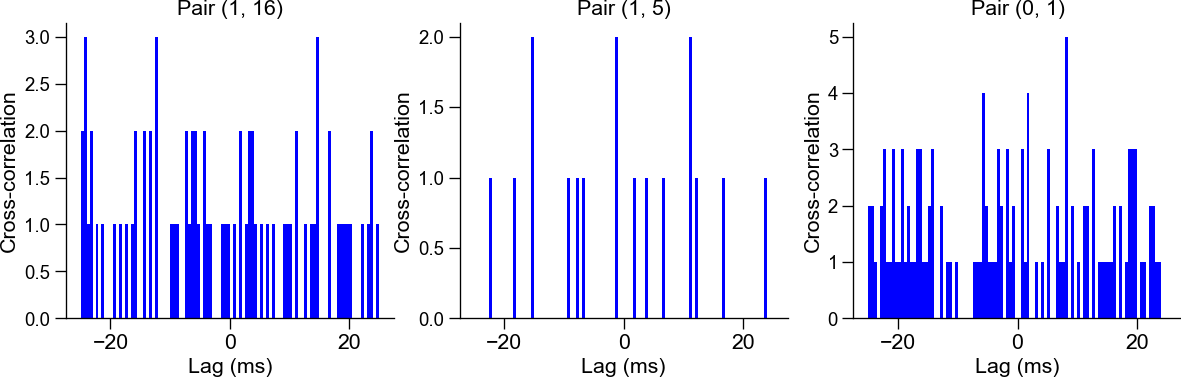

In [11]:
spike_pairs = [(1,16), (1,5), (0,1), (1,16)]
snc.plot_crosscorrelogram(spike_pairs=spike_pairs, figsize=(15, 4))

Alternatively, all possible pairs can be plotted.

In [12]:
# spike_labels = snc.get_spike_unit_labels()

# # get all possible pairs between labels as tuples (including self-pairs)
# spike_pairs = [(i, j) for i in spike_labels for j in spike_labels]
# snc.plot_crosscorrelogram(spike_pairs=spike_pairs, figsize=(20, 30))

## Return correlogram data
----

Next, try returning the correlogram data.

Each key in 'cross_correlations' is indexed by the unit pairs. The corresponding numbers refer to the spike counts, per bin.

Each key in 'bins' is also indexed by the unit pairs. The corresponding numbers refer to the bins edges.

In [13]:
correlogram_data = snc.return_crosscorrelogram_data(spike_pairs=spike_pairs)
correlogram_data

{'cross_correllations': {(1,
   16): array([2, 3, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2,
         0, 2, 0, 3, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1,
         0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0,
         0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 2, 0, 0, 1, 1,
         1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1]),
  (1,
   5): array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
  (0,
   1): array([2, 2, 1, 0, 2, 3, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 3, 3, 1, 1, 2, 3,
         0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 4, 2, 1, 1, 1, 3,
         2, 0, 3, 1, 2, 0, 0, 3, 1, 4, 0, 0, 1, 0, 1, 0, 3, 0, 0, 2, 1, 1,
         5, 0, 2, 0, 1, 

Check the bin settings using for correlogram generations.

In [14]:
snc.report_correlogram_settings()

'Bin size: 0.5 ms, Max lag: 25 ms'

## Compute monosynaptic connections 
----

Compute excitatory and inhibitory monosynaptic connections between spike trains. 

This analysis was based on the following reference by Najafi et al., [here](https://www.sciencedirect.com/science/article/pii/S0896627319308487). This protocol was based on data and experimental analyses provided in the following [here](https://www.cell.com/cell-reports/fulltext/S2211-1247(23)01487-0?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2211124723014870%3Fshowall%3Dtrue).

> **computational strength calculations notes**

> First, compute synaptic strength for a set of neuron IDs. If a given unit consistently fires after a second unit, indicated by a peak in the CCG, there is high chance that these cells are functionally linked either directly through an excitatory synaptic connection or indirectly through a third neuron providing a common input.

> To compute synaptic strength, the firing of a single unit in a pair was jittered across a number of iterations (num_iterations) within a time range (jitter_range_ms). 
These were used to calculate a confidence interval (CI) between 1% and 99%. If the real CCG peak passed the 99% CI, the corresponding functional connection would be considered
significant and not random.

> A z-score was then performed using the following equation:

> ```Z = x_real - mean_jitter / std_jitter```

Inspect the output synaptic strength data.

Note that the output contains the following keys: 
1. ccg bins
2. ccg counts (from original spike trains)
3. ccg counts (post jitter)
4. synaptic strength
5. high confidence interval (99%), calculated on jittered ccg
6. low confidence interval (1%), calculation on jittered ccg
7. ccg counts (within jitter range window)
8. low confidence interal (1%), within jitter range window
9. high confidence interal (99%), within jitter range window

In [15]:
synaptic_strength_data = snc.synaptic_strength(spike_pairs=spike_pairs, num_iterations=1000, jitter_range_ms=10)

# isolate single pair
pair = (1, 16)
synaptic_strength_data[pair]

{'ccg_bins': array([-25. , -24.5, -24. , -23.5, -23. , -22.5, -22. , -21.5, -21. ,
        -20.5, -20. , -19.5, -19. , -18.5, -18. , -17.5, -17. , -16.5,
        -16. , -15.5, -15. , -14.5, -14. , -13.5, -13. , -12.5, -12. ,
        -11.5, -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,
         -7. ,  -6.5,  -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,
         -2.5,  -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,
          2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,
          6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,
         11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ,
         15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,  19. ,  19.5,
         20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,  24. ,
         24.5,  25. ]),
 'original_ccg_counts': array([2, 3, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2,
        0, 2, 0, 3, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1,
        0, 0

Check the synaptic strength data for a select pair.

This can be done automatically by plotting the original ccg, and the z-scored value.

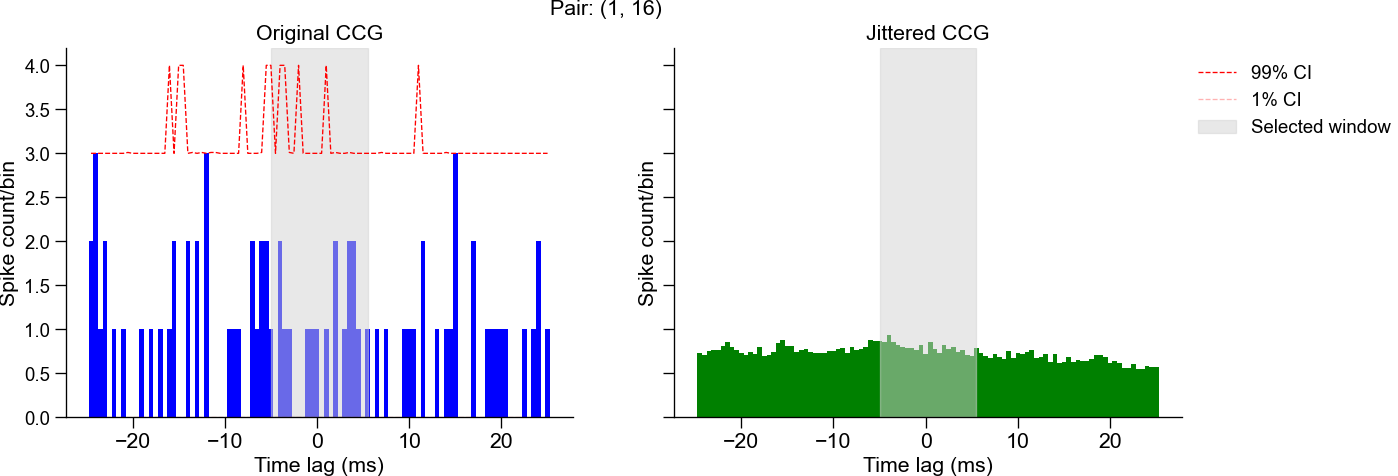

In [16]:
snc.plot_synaptic_strength(spike_pair = pair)

**Next, check the connection type.** 

Here, we can perform a putative detection using the z-score (synaptic strength) output.

Thresholds should be set as > 5 for excitatory-connections, or inhibitory connections as < -5 based on the reference protocol.

In [23]:
exc_connection_types = snc.monosynaptic_connection_types(threshold = 5)
exc_df = pd.DataFrame(exc_connection_types).T
exc_df

putative_exc_connection_type
1 16                    undefined
  5                     undefined
0 1                     undefined

Output a features dataframe containing selected spike pair connections and associated ccg features.

These can be used to provide simple information on the quality of the CCG, and associated connection types.

In [24]:
synaptic_features = snc.monosynaptic_connection_features()
synaptic_features_df = pd.DataFrame(synaptic_features).T
synaptic_features_df

synaptic_strength  ccg_peak_time_ms  ccg_peak_amp  bootstrap_std  \
1 16           1.373045             -24.5           3.0       0.083477   
  5            4.044849             -15.5           2.0       0.044661   
0 1            2.619240               8.0           5.0       0.117966   

        ccg_cv  
1 16  1.070894  
  5   2.637893  
0 1   0.914768

The output dataframes can be merged for simplicity and further analyses.

In [25]:
merged_df = exc_df.join(synaptic_features_df)
merged_df

putative_exc_connection_type  synaptic_strength  ccg_peak_time_ms  \
1 16                    undefined           1.373045             -24.5   
  5                     undefined           4.044849             -15.5   
0 1                     undefined           2.619240               8.0   

      ccg_peak_amp  bootstrap_std    ccg_cv  
1 16           3.0       0.083477  1.070894  
  5            2.0       0.044661  2.637893  
0 1            5.0       0.117966  0.914768

## Validate connection type using waveform classifications
-----

Connection types are putatively based on CCG profiles. However, they should be cross-validated with waveform shapes and/or properties.

For example, an excitatory neuron synapsed to a inhibitory interneuron, or two excitatory neurons are most likely to confer a excitatory-excitatory connection type. 

In such cases, neuron types can be postulated based on the waveforms alone, or additional firing properties, or even ACG profiles. 

## Cross-check electrode distances
-----

Use the electrode distances outputted from Phy to validate neuron-neuron connections.

## TO DO:
-----

- There are a number of ways to validate the significance of the connections ... build these in??? Poission distributions??

- Make another notebook and check on a small subset of data

- Start writing up documents for github

- Improve the README ...

- Move core modules to a utils.py file

- Can possibly perform a cross-correlation analysis also on the spike trains ... see Elephant package for this

- Map the spike positions using the outputs from SpikeInterface and probe interface??? Make functional assessments between the two

- Ensure the variable naming is clear for all

- Can you integrate it to map the connections between cells?

- Make a JSON output --> export module for the dataset! This will be then easier to load --> make another option to batch-process and visualize multiple datasets etc. etc.

- Make an option to add new data -- therefore clearing the previous data here

- Check this analysis with a DANDI dataset

- Make a simulation model for ccgs and times etc. etc. to test these parameters

- Test units

- Style is not being fitted globally --> the decorator is useless?

- Document all the steps in place to check this all out ...

- Build a core object which allows for batch-processing, but also adds in the srates etc. of the recordings

- Option to cross-check with the distances???

- Fix the CCG plots